#INSTRUCTIONS TO RUN THE CODE
1. Download the data set from this link and save it in the google drive.
(https://www.kaggle.com/tareqkhanemu/snoring)
2. Mount Google Drive and run the subsequent data preparation cells and save the .json files thus formed in the desired paths.
3. Load the .json files as and when required and execute the rest of the code.
4. The .json files have been uploaded into the google drive and the links are   provided below:

*   MFCC DATA: https://drive.google.com/file/d/10qFQ-WEH9rg6p9LFZxIOiLqSKayxvNbJ/view?usp=sharing
*   MEL SPECTROGRAM: https://drive.google.com/file/d/1JoqyGrEL7F0ah7A8w2BNJlC17J3oLDDQ/view?usp=sharing

This is being provided because step 2 is time consuming.
5. Follow the comments for additional info.

GOOGLE COLAB IMPORT

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


###DATA PREPARATION MFCC
Run this cell to create MFCC .json file (step 2)

In [ ]:
#The following code takes the dataset and produces a json file containing the Mel Frequency Cepstral Coefficient(MFCC)
#representstion of each audio file along with its label
import json
import os
import math
import librosa

DATASET_PATH = "/content/drive/MyDrive/PROJECT/T_Khan-Snoring_Dataset"
JSON_PATH = "/content/drive/MyDrive/PROJECT/T_Khan-Snoring_Dataset/data_MFCC_PAPER.json"


def save_mfcc(dataset_path, json_path, num_mfcc=32, n_fft=512):
    """Extracts MFCCs from snoring dataset and saves them into a json file along labels(snoring:1,non-snoring:0)
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    # loop through all sub-folders
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in label sub-dir
            for f in filenames:
              # load audio file
              file_path = os.path.join(dirpath, f)
              signal, sample_rate = librosa.load(file_path)

              # extract mfcc
              mfcc = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length = int(sample_rate/32)+1)
              mfcc = mfcc.T
              data["mfcc"].append(mfcc.tolist())
              data["labels"].append(i-1)

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH)


Processing: 0

Processing: 1

Processing: .ipynb_checkpoints


###DATA PREPARATION MEL SPECTOGRAM
Run this cell to create new MEL SPECTROGRAM .json file (step 2)

In [ ]:
#The following code takes the dataset and produces a json file containing the Mel Spectogram
#representstion of each audio file along with its label
import json
import os
import math
import librosa
import librosa.display

DATASET_PATH = "/content/drive/MyDrive/PROJECT/T_Khan-Snoring_Dataset"
JSON_PATH = "/content/drive/MyDrive/PROJECT/T_Khan-Snoring_Dataset/data_MEL_SPEC_final.json"

def save_MEL(dataset_path, json_path, num_mfcc=32, n_fft=512):
    """Extracts MFCCs from snoring dataset and saves them into a json file along labels(snoring:1,non-snoring:0)
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "MELSPEC": []
    }
    # loop through all label sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a label sub-folder level
        if dirpath is not dataset_path:

            # save  label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in label sub-dir
            for f in filenames:

		             # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path)
                # extract MEL SPECTOGRAM
                   
                sgram = librosa.stft(signal)
                #librosa.display.specshow(sgram)
                # use the mel-scale instead of raw frequency
                sgram_mag, _ = librosa.magphase(sgram)
                mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
                # use the decibel scale to get the final Mel Spectrogram
                mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
                data["MELSPEC"].append(mel_sgram.tolist())
                data["labels"].append(i-1)
                print("{}".format(file_path))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
        
if __name__ == "__main__":
    save_MEL(DATASET_PATH, JSON_PATH)

#Loading the data

### SOME EDA

Text(0, 0.5, 'Amplitude')

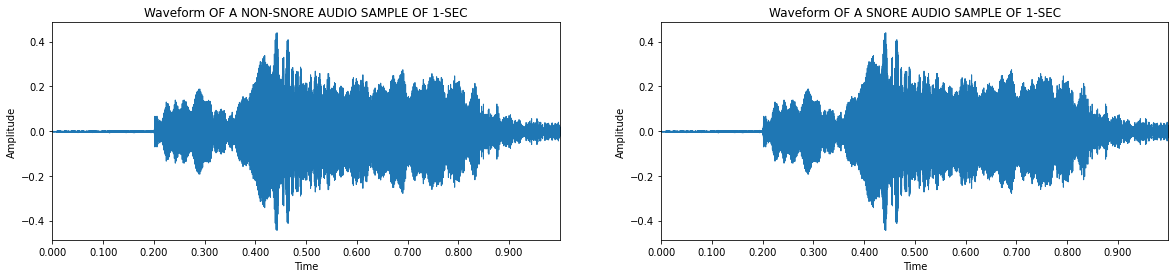

In [ ]:
import json
import os
import math
import librosa
import librosa.display
import matplotlib.pyplot as plt

file_0 = "/content/drive/MyDrive/PROJECT/T_Khan-Snoring_Dataset/0/0_0.wav"
file_1 = "/content/drive/MyDrive/PROJECT/T_Khan-Snoring_Dataset/0/1_0.wav"
#waveform
plt.figure(figsize=(20, 4))
ax1 = plt.subplot(1,2,1)
signal, sr = librosa.load(file_0) 
librosa.display.waveplot(signal, sr=sr)
ax1.set(title='Waveform OF A NON-SNORE AUDIO SAMPLE OF 1-SEC')
plt.xlabel("Time")
plt.ylabel("Amplitude")

ax2 = plt.subplot(1,2,2)
signal, sr = librosa.load(file_0) 
librosa.display.waveplot(signal, sr=sr)
ax2.set(title='Waveform OF A SNORE AUDIO SAMPLE OF 1-SEC')
plt.xlabel("Time")
plt.ylabel("Amplitude")


In [ ]:
 PATH = "/content/drive/MyDrive/PROJECT/T_Khan-Snoring_Dataset/data_MFCC_PAPER.json"
 PATH1 = "/content/drive/MyDrive/PROJECT/T_Khan-Snoring_Dataset/data_MEL_SPEC_final.json"
 def load_data(PATH):
   """Loads training dataset from json file.
   :param Path (str): Path to json file containing data
   :return X (ndarray): Inputs
   :return y (ndarray): Targets
   """
   with open(PATH, "r") as fp:
     data = json.load(fp)

   # convert lists to numpy arrays
   if "mfcc" in data:
     X = np.array(data["mfcc"])
   else:
     X = np.array(data["MELSPEC"])
    
   
   y = np.array(data["labels"])
   #X = np.expand_dims(X, axis=1)
   #y = np.expand_dims(y,axis=1)
   #X = (X - np.mean(X))/np.amax(X)
   print("Data succesfully loaded!")
   return  X, y

 # load data
 X_1,y_1 = load_data(PATH) #MFCC
 X_2,y_2 = load_data(PATH1) #MELSPEC

Data succesfully loaded!
Data succesfully loaded!


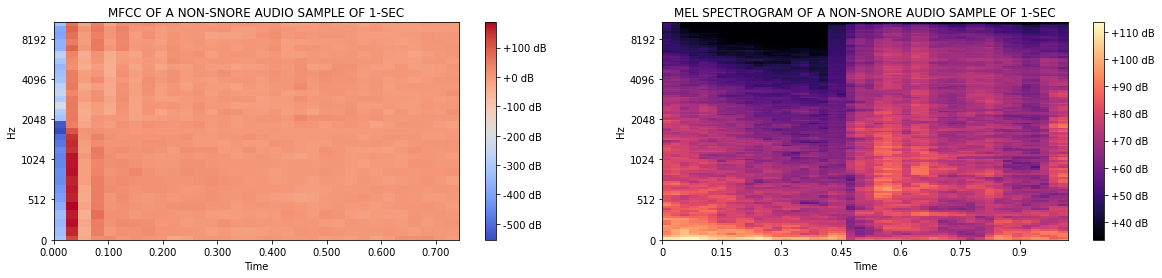

In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20, 4))
ax1 = plt.subplot(1,2,1)
MFCC = X_1[0] # THE DATA IS ARRANGED SUCH THAT Indices 0-499 are snore samples
IMG1 = librosa.display.specshow(MFCC,  x_axis='time', y_axis='mel',ax=ax1)
ax1.set(title='MFCC OF A NON-SNORE AUDIO SAMPLE OF 1-SEC')
plt.colorbar(IMG1,format='%+2.0f dB')
ax2 = plt.subplot(1,2,2)
msg = X_2[0]
IMG2 = librosa.display.specshow(msg,  x_axis='time', y_axis='mel',ax=ax2)
ax2.set(title='MEL SPECTROGRAM OF A NON-SNORE AUDIO SAMPLE OF 1-SEC')
plt.colorbar(IMG2,format='%+2.0f dB')

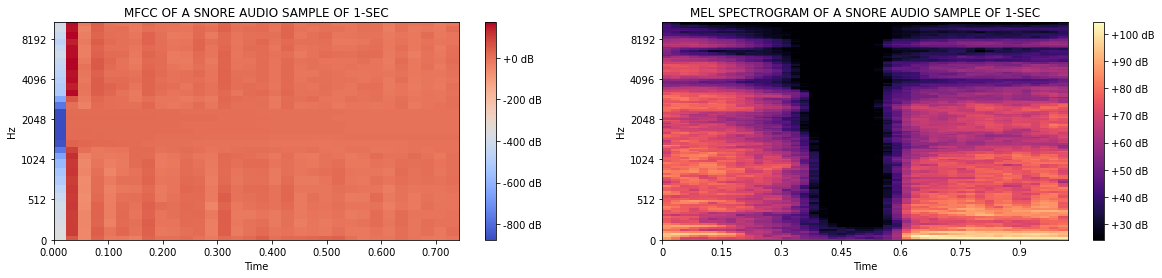

In [ ]:
plt.figure(figsize=(20, 4))
ax1 = plt.subplot(1,2,1)
MFCC = X_1[500]
IMG1 = librosa.display.specshow(MFCC,  x_axis='time', y_axis='mel',ax=ax1)
ax1.set(title='MFCC OF A SNORE AUDIO SAMPLE OF 1-SEC')# THE DATA IS ARRANGED SUCH THAT Indices 500-999 are snore samples
plt.colorbar(IMG1,format='%+2.0f dB')
ax2 = plt.subplot(1,2,2)
msg = X_2[500]
IMG2 = librosa.display.specshow(msg,  x_axis='time', y_axis='mel',ax=ax2)
ax2.set(title='MEL SPECTROGRAM OF A SNORE AUDIO SAMPLE OF 1-SEC')
plt.colorbar(IMG2,format='%+2.0f dB')

In [ ]:
#Run the following code to load the data and split it into test,train and validation
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import math

def DATA_PREP_LOAD(PATH,batch_size):
   """Loads training dataset from json file.
   :param PATH (str): Path to json file containing data
   :param batch_size(int): Desired batch size for training on data
   :return train_loader, valid_loader, test_loader: Dataloaders for training validation and testing respectively
   """
 
 def load_data(PATH):
   """Loads training dataset from json file.
   :param Path (str): Path to json file containing data
   :return X (ndarray): Inputs
   :return y (ndarray): Targets
   """
   with open(PATH, "r") as fp:
     data = json.load(fp)

   # convert lists to numpy arrays
   if "mfcc" in data:
     X = np.array(data["mfcc"])
   else:
     X = np.array(data["MELSPEC"])
    
   
   y = np.array(data["labels"])
   X = np.expand_dims(X, axis=1)
   y = np.expand_dims(y,axis=1)
   #X = (X - np.mean(X))/np.amax(X)
   print("Data succesfully loaded!")
   return  X, y

 # load data
 X,y = load_data(PATH)

 # create train/test split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)
 
 class SnoreDataset_train(Dataset):
   def __init__(self):
    
     self.n_samples = X_train.shape[0]
    
     self.x_data = torch.Tensor(X_train) # size [n_samples, n_features]
     self.y_data = torch.Tensor(y_train) # size [n_samples, 1]

     # support indexing such that dataset[i] can be used to get i-th sample
   
   def __getitem__(self, index):
     return self.x_data[index], self.y_data[index]
     
   # we can call len(dataset) to return the size
   def __len__(self):
     return self.n_samples

 class SnoreDataset_val(Dataset):
   def __init__(self):
     self.n_samples = X_val.shape[0]
     self.x_data = torch.Tensor(X_val) # size [n_samples, n_features]
     self.y_data = torch.Tensor(y_val) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
   def __getitem__(self, index):
     return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
   def __len__(self):
     return self.n_samples

 class SnoreDataset_test(Dataset):
   
   def __init__(self):
     # Initialize data, download, etc.
     self.n_samples = X_test.shape[0]
  
     self.x_data = torch.Tensor(X_test) # size [n_samples, n_features]
     self.y_data = torch.Tensor(y_test) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
   def __getitem__(self, index):
     return self.x_data[index], self.y_data[index]

   # we can call len(dataset) to return the size
   def __len__(self):
     return self.n_samples



  # create dataset
 dataset_train = SnoreDataset_train()
 dataset_val = SnoreDataset_val()
 dataset_test = SnoreDataset_test()

 # Load whole dataset with DataLoader
 train_loader = DataLoader(dataset=dataset_train ,
                            batch_size=batch_size,
                            shuffle=True,
                            num_workers=2)
 valid_loader = DataLoader(dataset=dataset_val ,
                            batch_size=batch_size,
                            shuffle=True,
                            num_workers=2)
 test_loader = DataLoader(dataset=dataset_test ,
                            batch_size=batch_size,
                            shuffle=True,
                            num_workers=2)
 
 return train_loader, valid_loader, test_loader

IMPORTS FOR MAKING PYTORCH MODEL

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
from torch.nn.utils.rnn import pack_padded_sequence
#config
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

TRAINING LOOP

In [ ]:
def training_loop(model,PATH, num_epochs = 20, learning_rate = 0.001, batch_size = 20):
   """Trains the NN models
   :param model: Object of the particular NN architecture class
   :PATH: Path to load the data
   :num_epochs(int): Number of epochs 
   learning_rate(float): Learning rate for training
   :param batch_size(int): Desired batch size for training on data
   :return test_loss, validation_loss and test_loader
   """
  train_loader, valid_loader, test_loader = DATA_PREP_LOAD(PATH,batch_size)
  import time
  # calculate steps per epoch for training and validation set
  trainSteps = len(train_loader.dataset) // batch_size
  valSteps = len(valid_loader.dataset) // batch_size
  #Loss and optimize
  criterion = nn.functional.binary_cross_entropy
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  # initialize a dictionary to store training history
  H = {
      "train_loss": [],
 
       "val_loss": [],

       }
  # measure how long training is going to take
  print("[INFO] training the network...")
  startTime = time.time()


  # loop over our epochs
  for e in range(0, num_epochs):
    # set the model in training mode
    model.train()
	  # initialize the total training and validation loss
    totalTrainLoss = 0
    totalValLoss = 0
 
    # loop over the training set
    for i,(X, y) in enumerate(train_loader):
      # send the input to the device
      X = X.to(device) 
      y = y.to(device)
      # perform a forward pass and calculate the training loss
      pred = model(X)
      loss = criterion(pred, y)
		  # zero out the gradients, perform the backpropagation step,
		  # and update the weights
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # add the loss to the total training loss so far and
      # calculate the number of correct predictions
      totalTrainLoss += loss
  
    #VALIDATION
  
    with torch.no_grad():
      # set the model in evaluation mode
      model.eval()
      # loop over the validation set
      for (X, y) in valid_loader:
        # send the input to the device
        X = X.to(device) 
        y = y.to(device)
        # make the predictions and calculate the validation loss
        pred = model(X)
        totalValLoss += criterion(pred, y)
  
	  # calculate the average training and validation loss
    avgTrainLoss = totalTrainLoss / trainSteps
    avgValLoss = totalValLoss / valSteps

    # update our training history
    H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())

    H["val_loss"].append(avgValLoss.cpu().detach().numpy())

    # print the model training and validation information
    print("[INFO] EPOCH: {}/{}".format(e + 1, num_epochs))
    print("Train loss: {:.6f}, Val loss: {:.4f}".format(
        avgTrainLoss, avgValLoss))

  

  # finish measuring how long training took
  endTime = time.time()
  print("[INFO] total time taken to train the model: {:.2f}s".format(endTime - startTime))
  return H["train_loss"], H["val_loss"],test_loader

In [ ]:
def weight_reset(m):
  """THIS FUNCTION RESETS THE WEIGHTS OF A TRAINED MODEL"""
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear) or isinstance(m, nn.LSTM):
        m.reset_parameters()

#BASELINE PAPER MODEL (MFCC_FEATURE)

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1,padding= 1 ),
            nn.ReLU(),)
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(),
            )
        self.layer3 = nn.Sequential(
             nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
             nn.ReLU(),
        )
        self.layer4 = nn.Sequential(
             nn.Conv2d(64, 64, kernel_size=3, stride=1),
             nn.ReLU(),
             nn.MaxPool2d(kernel_size=2, stride=2),
             nn.Dropout(),
        ) 

        self.fc1 = nn.Sequential(
            nn.Linear(6 * 6 * 64, 512),
            nn.ReLU(),
            nn.Dropout(),
        )
        self.fc2 = nn.Sequential(
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Dropout(),
        )
        self.fc3 = nn.Sequential(
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out


BM_1 = ConvNet().to(device)
print (BM_1)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.5, inplace=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.5, inplace=False)
  )
  (fc1): Sequential(
    (0): Linear(in_features=2304, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc2): Sequential(
    (0): Linear(in_features=512, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc3): Sequentia

In [ ]:
BM_1.apply(weight_reset)

In [ ]:
PATH = "/content/drive/MyDrive/PROJECT/T_Khan-Snoring_Dataset/data_MFCC_PAPER.json" #Give the path of the json files here.(Different paths for melspec and MFCC)
train_loss, val_loss, test_loader = training_loop(BM_1 , PATH, num_epochs = 20, learning_rate = 0.0001, batch_size = 50)

Data succesfully loaded!
[INFO] training the network...
[INFO] EPOCH: 1/20
Train loss: 0.767485, Val loss: 0.9195
[INFO] EPOCH: 2/20
Train loss: 0.757096, Val loss: 0.9051
[INFO] EPOCH: 3/20
Train loss: 0.752332, Val loss: 0.8995
[INFO] EPOCH: 4/20
Train loss: 0.745189, Val loss: 0.8977
[INFO] EPOCH: 5/20
Train loss: 0.725308, Val loss: 0.8870
[INFO] EPOCH: 6/20
Train loss: 0.718029, Val loss: 0.8834
[INFO] EPOCH: 7/20
Train loss: 0.711430, Val loss: 0.8597
[INFO] EPOCH: 8/20
Train loss: 0.686762, Val loss: 0.8426
[INFO] EPOCH: 9/20
Train loss: 0.676371, Val loss: 0.8334
[INFO] EPOCH: 10/20
Train loss: 0.662082, Val loss: 0.7486
[INFO] EPOCH: 11/20
Train loss: 0.611575, Val loss: 0.7039
[INFO] EPOCH: 12/20
Train loss: 0.556879, Val loss: 0.6144
[INFO] EPOCH: 13/20
Train loss: 0.530856, Val loss: 0.5767
[INFO] EPOCH: 14/20
Train loss: 0.487372, Val loss: 0.4064
[INFO] EPOCH: 15/20
Train loss: 0.424636, Val loss: 0.3151
[INFO] EPOCH: 16/20
Train loss: 0.370611, Val loss: 0.2934
[INFO] EP

PLOT LOSS

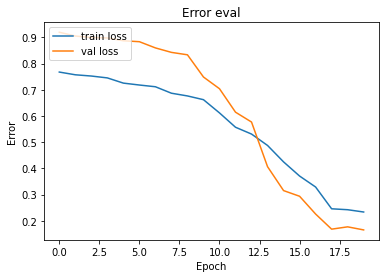

In [ ]:
fig, ax = plt.subplots()
ax.plot(train_loss, label="train loss")
ax.plot(val_loss, label="val loss")
ax.set_ylabel("Error")
ax.set_xlabel("Epoch")
ax.legend(loc="upper left")
ax.set_title("Error eval")

plt.show()

EVALUATE THE MODEL

In [ ]:
# Test the model
y_pred_list = []
y_test_list = []
with torch.no_grad():
  BM_1.eval()  # eval mode 
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = BM_1(images)
    predicted = torch.round(outputs)
    y_pred_list.append(predicted.cpu().numpy())
    y_test_list.append(labels.cpu().numpy())
    total += labels.size(0)
    correct += (predicted == labels).sum().item()


print('Model1 (baseline) Accuracy on the test SNORE SOUND SAMPLES using MFCC features: {} %'.format(100 * correct / total))

# flatten prediction and true lists
flat_pred = []
flat_true = []
for i in range(len(y_pred_list)):
    for j in range(len(y_pred_list[i])):
        flat_pred.append(y_pred_list[i][j])
        flat_true.append(y_test_list[i][j])

from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("\n")
print("\t\t CLASSIFICATION REPORT\n")
print(classification_report(flat_true, flat_pred,target_names=target_names))

Model1 (baseline) Accuracy on the test SNORE SOUND SAMPLES using MFCC features: 96.5 %


		 CLASSIFICATION REPORT

              precision    recall  f1-score   support

     class 0       0.95      0.99      0.97       107
     class 1       0.99      0.94      0.96        93

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



#BASELINE PAPER MODEL WITH SLIGHT MODIFICATIONS 
FOR MAKING IT COMPATIBLE WITH MEL SPECTOGRAM FEATURE




In [ ]:
class ConvNet2(nn.Module):
    def __init__(self):
        super(ConvNet2, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1,padding= 1 ),
            nn.ReLU(),)
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(),
            )
        self.layer3 = nn.Sequential(
             nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
             nn.MaxPool2d(kernel_size=2, stride=2),
             nn.ReLU(),
        )
        self.layer4 = nn.Sequential(
             nn.Conv2d(64, 64, kernel_size=3, stride=1),
             nn.ReLU(),
             nn.MaxPool2d(kernel_size=2, stride=2),
             nn.Dropout(),
        ) 

        self.fc1 = nn.Sequential(
            nn.Linear(7 * 8 * 64, 512),
            nn.ReLU(),
            nn.Dropout(),
        )
        self.fc2 = nn.Sequential(
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Dropout(),
        )
        self.fc3 = nn.Sequential(
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out


BM_2 = ConvNet2().to(device)
print (BM_2)

ConvNet2(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.5, inplace=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.5, inplace=False)
  )
  (fc1): Sequential(
    (0): Linear(in_features=3584, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc2): Sequential(
    (0): Linear(in_features=512, out_features=64, bia

In [ ]:
BM_2.apply(weight_reset)

In [ ]:
#Give the path of the json files here.(Different paths for melspec and MFCC)
PATH1 = "/content/drive/MyDrive/PROJECT/T_Khan-Snoring_Dataset/data_MEL_SPEC_final.json"
train_loss, val_loss, test_loader = training_loop(BM_2 , PATH1, num_epochs = 20, learning_rate = 0.0001, batch_size = 100)

Data succesfully loaded!
[INFO] training the network...
[INFO] EPOCH: 1/20
Train loss: 0.873368, Val loss: 1.3866
[INFO] EPOCH: 2/20
Train loss: 0.820949, Val loss: 1.3780
[INFO] EPOCH: 3/20
Train loss: 0.815179, Val loss: 1.3767
[INFO] EPOCH: 4/20
Train loss: 0.812097, Val loss: 1.3774
[INFO] EPOCH: 5/20
Train loss: 0.804157, Val loss: 1.3825
[INFO] EPOCH: 6/20
Train loss: 0.810819, Val loss: 1.3829
[INFO] EPOCH: 7/20
Train loss: 0.809115, Val loss: 1.3797
[INFO] EPOCH: 8/20
Train loss: 0.805010, Val loss: 1.3781
[INFO] EPOCH: 9/20
Train loss: 0.803648, Val loss: 1.3757
[INFO] EPOCH: 10/20
Train loss: 0.813557, Val loss: 1.3745
[INFO] EPOCH: 11/20
Train loss: 0.803243, Val loss: 1.3753
[INFO] EPOCH: 12/20
Train loss: 0.802965, Val loss: 1.3773
[INFO] EPOCH: 13/20
Train loss: 0.799590, Val loss: 1.3763
[INFO] EPOCH: 14/20
Train loss: 0.811165, Val loss: 1.3757
[INFO] EPOCH: 15/20
Train loss: 0.800618, Val loss: 1.3738
[INFO] EPOCH: 16/20
Train loss: 0.793540, Val loss: 1.3760
[INFO] EP

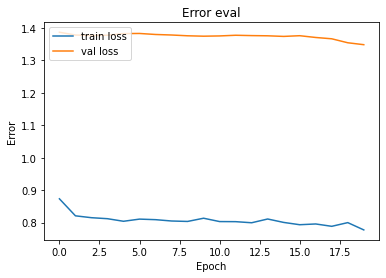

In [ ]:
fig, ax = plt.subplots()
ax.plot(train_loss, label="train loss")
ax.plot(val_loss, label="val loss")
ax.set_ylabel("Error")
ax.set_xlabel("Epoch")
ax.legend(loc="upper left")
ax.set_title("Error eval")

plt.show()

In [ ]:
# Test the model
y_pred_list = []
y_test_list = []
with torch.no_grad():
  BM_2.eval()  # eval mode 
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = BM_2(images)
    predicted = torch.round(outputs)
    y_pred_list.append(predicted.cpu().numpy())
    y_test_list.append(labels.cpu().numpy())
    total += labels.size(0)
    correct += (predicted == labels).sum().item()


print('Model-2(baseline) Accuracy on the test SNORE SOUND SAMPLES using MEL SPECTROGRAM: {} %'.format(100 * correct / total))

# flatten prediction and true lists
flat_pred = []
flat_true = []
for i in range(len(y_pred_list)):
    for j in range(len(y_pred_list[i])):
        flat_pred.append(y_pred_list[i][j])
        flat_true.append(y_test_list[i][j])

from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("\n")
print("\t\t CLASSIFICATION REPORT\n")
print(classification_report(flat_true, flat_pred,target_names=target_names))

Model-2(baseline) Accuracy on the test SNORE SOUND SAMPLES using MEL SPECTROGRAM: 65.0 %


		 CLASSIFICATION REPORT

              precision    recall  f1-score   support

     class 0       0.97      0.29      0.44        97
     class 1       0.60      0.99      0.74       103

    accuracy                           0.65       200
   macro avg       0.78      0.64      0.59       200
weighted avg       0.78      0.65      0.60       200



# SIMPLE DNN MODEL
FOR MFCC FEATURE

In [ ]:
class DNN1(nn.Module):
    def __init__(self):
        super(DNN1, self).__init__()

        self.fc1 = nn.Sequential(
            nn.Linear(32*32, 512),
            nn.ReLU(),
            nn.Dropout(),
        )
        self.fc2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(),
        )
        self.fc3 = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(),
        )
        self.fc4 = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(),
        )
        self.fc5 = nn.Sequential(
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )


    def forward(self, x):
        x = x.reshape(-1,32*32)
        
        out = self.fc1(x)
        out = self.fc2(out)
        out = self.fc3(out)
        out = self.fc4(out)
        out = self.fc5(out)
      
        return out


DNN_1 = DNN1().to(device)
print (DNN_1)

DNN1(
  (fc1): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc2): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc3): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc4): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc5): Sequential(
    (0): Linear(in_features=64, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


In [ ]:
DNN_1.apply(weight_reset)

In [ ]:
PATH = "/content/drive/MyDrive/PROJECT/T_Khan-Snoring_Dataset/data_MFCC_PAPER.json" #Give the path of the json files here.(Different paths for melspec and MFCC)
train_loss, val_loss, test_loader = training_loop(DNN_1, PATH, num_epochs = 20, learning_rate = 0.0001, batch_size = 50)

Data succesfully loaded!
[INFO] training the network...
[INFO] EPOCH: 1/20
Train loss: 1.559940, Val loss: 0.9888
[INFO] EPOCH: 2/20
Train loss: 1.358503, Val loss: 0.9192
[INFO] EPOCH: 3/20
Train loss: 1.194872, Val loss: 0.9177
[INFO] EPOCH: 4/20
Train loss: 1.094224, Val loss: 0.9116
[INFO] EPOCH: 5/20
Train loss: 1.016363, Val loss: 0.9183
[INFO] EPOCH: 6/20
Train loss: 1.008627, Val loss: 0.9212
[INFO] EPOCH: 7/20
Train loss: 0.864174, Val loss: 0.9188
[INFO] EPOCH: 8/20
Train loss: 0.878865, Val loss: 0.9179
[INFO] EPOCH: 9/20
Train loss: 0.882536, Val loss: 0.9070
[INFO] EPOCH: 10/20
Train loss: 0.836991, Val loss: 0.9002
[INFO] EPOCH: 11/20
Train loss: 0.804557, Val loss: 0.9105
[INFO] EPOCH: 12/20
Train loss: 0.805465, Val loss: 0.9086
[INFO] EPOCH: 13/20
Train loss: 0.771461, Val loss: 0.8900
[INFO] EPOCH: 14/20
Train loss: 0.813608, Val loss: 0.8842
[INFO] EPOCH: 15/20
Train loss: 0.796445, Val loss: 0.8783
[INFO] EPOCH: 16/20
Train loss: 0.763589, Val loss: 0.8562
[INFO] EP

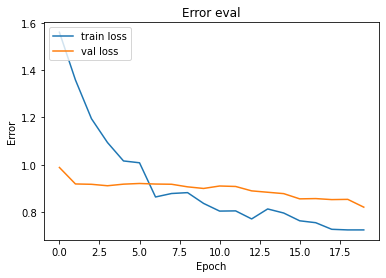

In [ ]:
fig, ax = plt.subplots()
ax.plot(train_loss, label="train loss")
ax.plot(val_loss, label="val loss")
ax.set_ylabel("Error")
ax.set_xlabel("Epoch")
ax.legend(loc="upper left")
ax.set_title("Error eval")

plt.show()

In [ ]:
# Test the model
y_pred_list = []
y_test_list = []
with torch.no_grad():
  DNN_1.eval()  # eval mode 
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = DNN_1(images)
    predicted = torch.round(outputs)
    y_pred_list.append(predicted.cpu().numpy())
    y_test_list.append(labels.cpu().numpy())
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
#y_test_list = [a.squeeze().tolist() for a in y_test_list]

print('Simple DNN-1 Accuracy on the test SNORE SOUND SAMPLES using MFCC Features: {} %'.format(100 * correct / total))

# flatten prediction and true lists
flat_pred = []
flat_true = []
for i in range(len(y_pred_list)):
    for j in range(len(y_pred_list[i])):
        flat_pred.append(y_pred_list[i][j])
        flat_true.append(y_test_list[i][j])

from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("\n")
print("\t\t CLASSIFICATION REPORT\n")
print(classification_report(flat_true, flat_pred,target_names=target_names))

Simple DNN-1 Accuracy on the test SNORE SOUND SAMPLES using MFCC Features: 66.0 %


		 CLASSIFICATION REPORT

              precision    recall  f1-score   support

     class 0       0.88      0.36      0.51        99
     class 1       0.60      0.95      0.74       101

    accuracy                           0.66       200
   macro avg       0.74      0.66      0.63       200
weighted avg       0.74      0.66      0.63       200



# SIMPLE DNN MODEL
Using Mel SPectrogram

In [ ]:
class DNN2(nn.Module):
    def __init__(self):
        super(DNN2, self).__init__()

        self.fc1 = nn.Sequential(
            nn.Linear(128*44, 1024),
            nn.ReLU(),
            nn.Dropout(),
        )
        self.fc2 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(),
        )
        self.fc3 = nn.Sequential(
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Dropout(),
        )
        self.fc4 = nn.Sequential(
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(),
        )
        self.fc5 = nn.Sequential(
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )


    def forward(self, x):
        x = x.reshape(-1,128*44)
        
        out = self.fc1(x)
        out = self.fc2(out)
        out = self.fc3(out)
        out = self.fc4(out)
        out = self.fc5(out)
      
        return out


DNN_2 = DNN2().to(device)
print (DNN_2)

DNN2(
  (fc1): Sequential(
    (0): Linear(in_features=5632, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc2): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc3): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc4): Sequential(
    (0): Linear(in_features=256, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc5): Sequential(
    (0): Linear(in_features=64, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


In [ ]:
DNN_2.apply(weight_reset)

In [ ]:
PATH = "/content/drive/MyDrive/PROJECT/T_Khan-Snoring_Dataset/data_MEL_SPEC_final.json" #Give the path of the json files here.(Different paths for melspec and MFCC)
train_loss, val_loss, test_loader = training_loop(DNN_2, PATH, num_epochs = 20, learning_rate = 0.0001, batch_size = 50)

Data succesfully loaded!
[INFO] training the network...
[INFO] EPOCH: 1/20
Train loss: 0.743119, Val loss: 0.9101
[INFO] EPOCH: 2/20
Train loss: 0.742400, Val loss: 0.9179
[INFO] EPOCH: 3/20
Train loss: 0.753543, Val loss: 0.9131
[INFO] EPOCH: 4/20
Train loss: 0.757054, Val loss: 0.9214
[INFO] EPOCH: 5/20
Train loss: 0.747110, Val loss: 0.9198
[INFO] EPOCH: 6/20
Train loss: 0.751426, Val loss: 0.9155
[INFO] EPOCH: 7/20
Train loss: 0.748252, Val loss: 0.9235
[INFO] EPOCH: 8/20
Train loss: 0.742415, Val loss: 0.9195
[INFO] EPOCH: 9/20
Train loss: 0.752341, Val loss: 0.9197
[INFO] EPOCH: 10/20
Train loss: 0.749715, Val loss: 0.9242
[INFO] EPOCH: 11/20
Train loss: 0.749884, Val loss: 0.9157
[INFO] EPOCH: 12/20
Train loss: 0.747798, Val loss: 0.9183
[INFO] EPOCH: 13/20
Train loss: 0.745274, Val loss: 0.9187
[INFO] EPOCH: 14/20
Train loss: 0.746889, Val loss: 0.9225
[INFO] EPOCH: 15/20
Train loss: 0.744984, Val loss: 0.9091
[INFO] EPOCH: 16/20
Train loss: 0.743795, Val loss: 0.9149
[INFO] EP

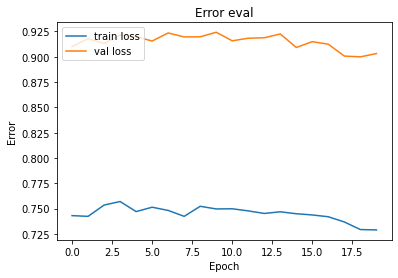

In [ ]:
fig, ax = plt.subplots()
ax.plot(train_loss, label="train loss")
ax.plot(val_loss, label="val loss")
ax.set_ylabel("Error")
ax.set_xlabel("Epoch")
ax.legend(loc="upper left")
ax.set_title("Error eval")

plt.show()

In [ ]:
# Test the model
y_pred_list = []
y_test_list = []
with torch.no_grad():
  DNN_2.eval()  # eval mode 
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = DNN_2(images)
    predicted = torch.round(outputs)
    y_pred_list.append(predicted.cpu().numpy())
    y_test_list.append(labels.cpu().numpy())
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
#y_test_list = [a.squeeze().tolist() for a in y_test_list]

print('Simple DNN-2 Accuracy on the test SNORE SOUND SAMPLES using Mel Spectrogram: {} %'.format(100 * correct / total))

# flatten prediction and true lists
flat_pred = []
flat_true = []
for i in range(len(y_pred_list)):
    for j in range(len(y_pred_list[i])):
        flat_pred.append(y_pred_list[i][j])
        flat_true.append(y_test_list[i][j])

from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("\n")
print("\t\t CLASSIFICATION REPORT\n")
print(classification_report(flat_true, flat_pred,target_names=target_names))

Simple DNN-2 Accuracy on the test SNORE SOUND SAMPLES using Mel Spectrogram: 59.5 %


		 CLASSIFICATION REPORT

              precision    recall  f1-score   support

     class 0       0.63      0.50      0.56       102
     class 1       0.57      0.69      0.63        98

    accuracy                           0.59       200
   macro avg       0.60      0.60      0.59       200
weighted avg       0.60      0.59      0.59       200



#CNN-LSTM MODEL
MFCC FEATURE

In [ ]:
#LSTM-CNN(two layer)
class LSTM_Net(nn.Module):
    def __init__(self):
        super(LSTM_Net, self).__init__()
        self.cnn1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1,padding= 1 ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            )
        self.cnn2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1,padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(),
            )
        self.lstm1   = nn.LSTM(input_size = 64, hidden_size = 512, num_layers =  1, batch_first = True)
        
        self.fc1 = nn.Sequential(
            nn.Linear(512, 1),
            nn.Sigmoid(),
        )
   
        
       
    def forward(self, x):
        out = self.cnn1(x)
        #print("CNN1 OUT:",  out.shape)
        out = self.cnn2(out)
        #print("CNN2 OUT:",out.shape)
        out = out.reshape(-1,64, 64)
        #print("LSTM INPUT:",out.shape)
        _, (lstm_out, _) = self.lstm1(out) 
        #print("LSTM OUTPUT:",lstm_out.shape)        
        out = lstm_out.reshape(-1, 512) 
        out = self.fc1(out)
        #print("OUTPUT:",out.shape)
        return out


lstm_1 = LSTM_Net().to(device)
print (lstm_1)

LSTM_Net(
  (cnn1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.5, inplace=False)
  )
  (lstm1): LSTM(64, 512, batch_first=True)
  (fc1): Sequential(
    (0): Linear(in_features=512, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


In [ ]:
lstm_1.apply(weight_reset)

In [ ]:
#Give the path of the json files here.(Different paths for melspec and MFCC)
PATH1 = "/content/drive/MyDrive/PROJECT/T_Khan-Snoring_Dataset/data_MFCC_PAPER.json"
train_loss, val_loss, test_loader = training_loop(lstm_1 , PATH1, num_epochs = 20, learning_rate = 0.0001, batch_size = 100)

Data succesfully loaded!
[INFO] training the network...
[INFO] EPOCH: 1/20
Train loss: 0.804776, Val loss: 1.3686
[INFO] EPOCH: 2/20
Train loss: 0.795728, Val loss: 1.3507
[INFO] EPOCH: 3/20
Train loss: 0.781913, Val loss: 1.3229
[INFO] EPOCH: 4/20
Train loss: 0.762959, Val loss: 1.3014
[INFO] EPOCH: 5/20
Train loss: 0.749277, Val loss: 1.2660
[INFO] EPOCH: 6/20
Train loss: 0.712442, Val loss: 1.2339
[INFO] EPOCH: 7/20
Train loss: 0.695239, Val loss: 1.1861
[INFO] EPOCH: 8/20
Train loss: 0.663595, Val loss: 1.1224
[INFO] EPOCH: 9/20
Train loss: 0.624334, Val loss: 1.0319
[INFO] EPOCH: 10/20
Train loss: 0.560527, Val loss: 0.9213
[INFO] EPOCH: 11/20
Train loss: 0.515873, Val loss: 0.8059
[INFO] EPOCH: 12/20
Train loss: 0.437705, Val loss: 0.9064
[INFO] EPOCH: 13/20
Train loss: 0.365963, Val loss: 0.6263
[INFO] EPOCH: 14/20
Train loss: 0.278450, Val loss: 0.4305
[INFO] EPOCH: 15/20
Train loss: 0.243652, Val loss: 0.4071
[INFO] EPOCH: 16/20
Train loss: 0.188922, Val loss: 0.3726
[INFO] EP

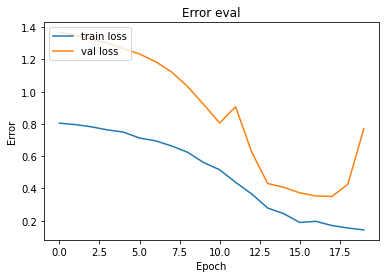

In [ ]:
fig, ax = plt.subplots()
ax.plot(train_loss, label="train loss")
ax.plot(val_loss, label="val loss")
ax.set_ylabel("Error")
ax.set_xlabel("Epoch")
ax.legend(loc="upper left")
ax.set_title("Error eval")

plt.show()

In [ ]:
# Test the model
y_pred_list = []
y_test_list = []
with torch.no_grad():
  lstm_1.eval()  # eval mode 
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = lstm_1(images)
    predicted = torch.round(outputs)
    y_pred_list.append(predicted.cpu().numpy())
    y_test_list.append(labels.cpu().numpy())
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
#y_test_list = [a.squeeze().tolist() for a in y_test_list]

print('LSTM-Model1 Accuracy on the test SNORE SOUND SAMPLES using MFCC FEATURE: {} %'.format(100 * correct / total))

# flatten prediction and true lists
flat_pred = []
flat_true = []
for i in range(len(y_pred_list)):
    for j in range(len(y_pred_list[i])):
        flat_pred.append(y_pred_list[i][j])
        flat_true.append(y_test_list[i][j])

from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("\n")
print("\t\t CLASSIFICATION REPORT\n")
print(classification_report(flat_true, flat_pred,target_names=target_names))

LSTM-Model1 Accuracy on the test SNORE SOUND SAMPLES using MFCC FEATURE: 86.5 %


		 CLASSIFICATION REPORT

              precision    recall  f1-score   support

     class 0       0.97      0.78      0.86       107
     class 1       0.79      0.97      0.87        93

    accuracy                           0.86       200
   macro avg       0.88      0.87      0.86       200
weighted avg       0.88      0.86      0.86       200



#CNN-LSTM MODEL
MEL SPECTROGRAM 

In [ ]:
#LSTM-CNN(two layer)
class LSTM_Net2(nn.Module):
    def __init__(self):
        super(LSTM_Net2, self).__init__()
        self.cnn1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1,padding= 1 ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            )
        self.cnn2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1,padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(),
            )
        self.lstm1   = nn.LSTM(input_size = 32*11, hidden_size = 512, num_layers =  1, batch_first = True)
        

        self.fc1 = nn.Sequential(
            nn.Linear(512, 1),
            nn.Sigmoid(),
        )
   
        
       
    def forward(self, x):
        out = self.cnn1(x)
        #print("CNN1 OUT:",  out.shape)
        out = self.cnn2(out)
        #print("CNN2 OUT:",out.shape)
        out = out.reshape(-1,64, 32*11)
        #print("LSTM INPUT:",out.shape)
        _, (lstm_out, _) = self.lstm1(out) 
        #print("LSTM OUTPUT:",lstm_out.shape)        
        out = lstm_out.reshape(-1, 512) 
        out = self.fc1(out)
        #print("OUTPUT:",out.shape)
        return out


lstm_2 = LSTM_Net2().to(device)
print (lstm_2)

LSTM_Net2(
  (cnn1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.5, inplace=False)
  )
  (lstm1): LSTM(352, 512, batch_first=True)
  (fc1): Sequential(
    (0): Linear(in_features=512, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


In [ ]:
#Give the path of the json files here.(Different paths for melspec and MFCC)
PATH1 = "/content/drive/MyDrive/PROJECT/T_Khan-Snoring_Dataset/data_MEL_SPEC_final.json"
train_loss, val_loss, test_loader = training_loop(lstm_2 , PATH1, num_epochs = 20, learning_rate = 0.0001, batch_size = 100)

Data succesfully loaded!
[INFO] training the network...
[INFO] EPOCH: 1/20
Train loss: 0.288200, Val loss: 0.7862
[INFO] EPOCH: 2/20
Train loss: 0.276823, Val loss: 0.8141
[INFO] EPOCH: 3/20
Train loss: 0.288313, Val loss: 0.3556
[INFO] EPOCH: 4/20
Train loss: 0.214001, Val loss: 0.5493
[INFO] EPOCH: 5/20
Train loss: 0.204437, Val loss: 0.4234
[INFO] EPOCH: 6/20
Train loss: 0.220760, Val loss: 0.5725
[INFO] EPOCH: 7/20
Train loss: 0.169148, Val loss: 0.2839
[INFO] EPOCH: 8/20
Train loss: 0.206125, Val loss: 0.3913
[INFO] EPOCH: 9/20
Train loss: 0.163270, Val loss: 0.4931
[INFO] EPOCH: 10/20
Train loss: 0.161616, Val loss: 0.2934
[INFO] EPOCH: 11/20
Train loss: 0.182047, Val loss: 0.2515
[INFO] EPOCH: 12/20
Train loss: 0.169012, Val loss: 0.2749
[INFO] EPOCH: 13/20
Train loss: 0.142380, Val loss: 0.4984
[INFO] EPOCH: 14/20
Train loss: 0.137823, Val loss: 0.2930
[INFO] EPOCH: 15/20
Train loss: 0.112330, Val loss: 0.2485
[INFO] EPOCH: 16/20
Train loss: 0.144054, Val loss: 0.3126
[INFO] EP

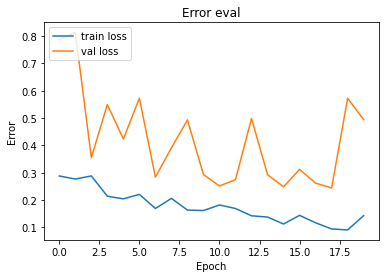

In [ ]:
fig, ax = plt.subplots()
ax.plot(train_loss, label="train loss")
ax.plot(val_loss, label="val loss")
ax.set_ylabel("Error")
ax.set_xlabel("Epoch")
ax.legend(loc="upper left")
ax.set_title("Error eval")

plt.show()

In [ ]:
# Test the model
y_pred_list = []
y_test_list = []
with torch.no_grad():
  lstm_2.eval()  # eval mode 
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = lstm_2(images)
    predicted = torch.round(outputs)
    y_pred_list.append(predicted.cpu().numpy())
    y_test_list.append(labels.cpu().numpy())
    total += labels.size(0)
    correct += (predicted == labels).sum().item()


print('LSTM-Model2 Accuracy on the test SNORE SOUND SAMPLES using MEL SPECTROGRAM FEATURE: {} %'.format(100 * correct / total))

# flatten prediction and true lists
flat_pred = []
flat_true = []
for i in range(len(y_pred_list)):
    for j in range(len(y_pred_list[i])):
        flat_pred.append(y_pred_list[i][j])
        flat_true.append(y_test_list[i][j])

from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("\n")
print("\t\t CLASSIFICATION REPORT\n")
print(classification_report(flat_true, flat_pred,target_names=target_names))

LSTM-Model2 Accuracy on the test SNORE SOUND SAMPLES using MEL SPECTROGRAM FEATURE: 91.5 %


		 CLASSIFICATION REPORT

              precision    recall  f1-score   support

     class 0       0.86      1.00      0.92       101
     class 1       1.00      0.83      0.91        99

    accuracy                           0.92       200
   macro avg       0.93      0.91      0.91       200
weighted avg       0.93      0.92      0.91       200

